# Proyecto I : Regresión Lineal 

Integrantes:
- Aldair Bernal Betancur
- Juan José Vera Arango


In [1]:
import matplotlib.pyplot as plt # Libreria para graficar y visualizar resultados
import numpy as np # libreria de manejo de datos matriciales y operaciones multivariadas
import math # Libreria de opreaciones matematicas
import scipy.io as sio # Libreria para cargar o escribir datos (Se utilizara para cargar nuestros DATASETS)
%matplotlib inline 

data = sio.loadmat('Biosignals.mat')
# los datos pueden ser verificados con la funcion print datos a mostrar
print data

{'GSR': array([[-0.00660929],
       [-0.00660929],
       [-0.00660929],
       ..., 
       [-0.0526087 ],
       [-0.0526087 ],
       [-0.0526087 ]]), 'HR': array([[  764.43494819],
       [  636.02893546],
       [ 1071.12188151],
       ..., 
       [  607.99773725],
       [  477.8104778 ],
       [  675.59136235]]), '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Feb 28 11:20:27 2018', '__globals__': [], 'x': array([[  0.00000000e+00,   1.53209744e-04,   3.06419488e-04, ...,
          9.99693581e-01,   9.99846790e-01,   1.00000000e+00]]), '__version__': '1.0'}


In [2]:
GSR = data['GSR'] #Se accede al campo GSR la cual son los valores de la Respuesta Galvanica de la Piel
HR = data['HR'] #Se accede al campo GSR la cual son los valores sobre el Ritmo Cardiaco
x = data['x'] #Se accede al campo x donde se encuentran las características del conjunto de entrenamiento
x = x.T
N, D = x.shape

## Analizando GSR

(4570L, 1L)

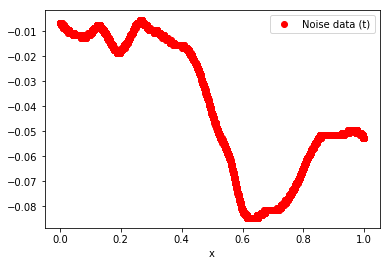

In [3]:
plt.plot(x,GSR,'or')
plt.xlabel('x')
plt.legend(('Noise data (t)', 'True data (y)'))

id = np.random.permutation(N)
perTrain = 0.7
NTr = int(round(N*perTrain))
idTr = id[:NTr]
idTe = id[NTr:]
xTr = x[idTr]
xTe = x[idTe]
GSRTr = GSR[idTr]
GSRTe = GSR[idTe]

plt.plot(xTr, GSRTr, 'or')
plt.xlabel('x')
GSRTr.shape

(1958L, 1L)

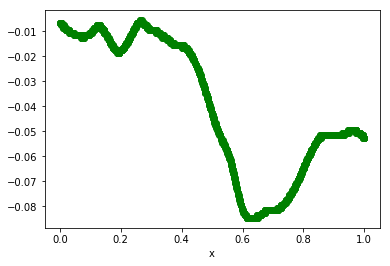

In [4]:
plt.plot(xTe, GSRTe, 'og')
plt.xlabel('x')
GSRTe.shape

## Funcion de regresión lineal y error

In [5]:
def LS(X,t,basisFNC,NbF):
    Ndata,D = X.shape
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    mu = np.random.uniform(0.0, 1.0, NbF+1)
    s2 = np.var(mu)
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
            if basisFNC == 'exp':
                PHI[n][i] = math.exp(-((X[n]-mu[i])**2)/(2*s2))
            if basisFNC == 'sig':
                PHI[n][i] = (1 / (1 + np.exp(-((X[n]-mu[i])/math.sqrt(s2)))))
    
    # Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst, s2  

def Erms(to, te):
    N, d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

### Regresion con funciones bases polinomial

0.0021970924134 0.00215446939023


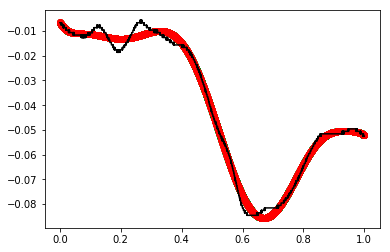

In [6]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,GSRTr,'pol',10)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,GSRTe,'pol', 10)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print RMStest, RMStrain

### Regresion con funciones bases exponencial

0.0022531959247 365.375292918


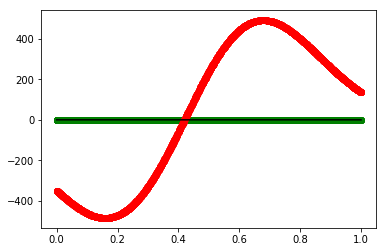

In [7]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,GSRTr,'exp',10)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,GSRTe,'exp',10)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print RMStest, RMStrain

### Regresion con funciones bases sigmoidal

0.162437626036 268621.223444


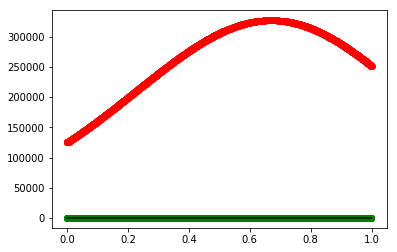

In [8]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,GSRTr,'sig',100)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,GSRTe,'sig', 100)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print RMStest, RMStrain

### Funcion de Regresion lineal con regularización y Error

In [9]:
def LS_Reg(X,t,basisFNC,NbF,lambdaI):
    Ndata,D = X.shape
    I = np.eye(NbF+1)
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    mu = np.random.uniform(0.0, 1.0, NbF+1)
    s2 = np.var(mu)
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
            if basisFNC == 'exp':
                PHI[n][i] = math.exp(-((X[n]-mu[i])**2)/(2*s2))
            if basisFNC == 'sig':
                PHI[n][i] = (1 / (1 + np.exp(-((X[n]-mu[i])/math.sqrt(s2)))))
# Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(lambdaI*I+PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst

def Erms(to, te):
    N, d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

### Regresion con regularización con funciones bases polinomial

0.00204691635284 0.00200173075852


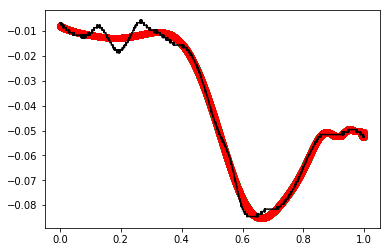

In [10]:

lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,GSRTr,'pol',100, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,GSRTe,'pol',100, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print RMStest, RMStrain

### Regresión con regularización con funciones exponenciales

0.00220675365089 19.3935931538


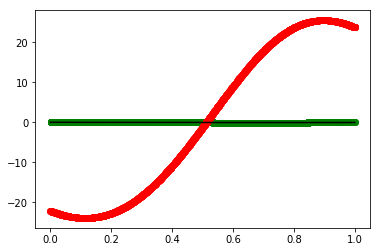

In [11]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,GSRTr,'exp',100, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,GSRTe,'exp',100, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print RMStest, RMStrain



### Regresión con regularización con funciones sigmoidales

0.00876260896362 0.105495673463


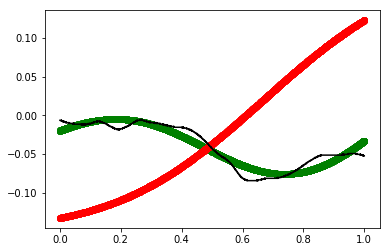

In [12]:
lambdaI = math.exp(-2.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,GSRTr,'sig',150, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,GSRTe,'sig',150, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print RMStest, RMStrain


## Regresion Bayesiana

### Regresión bayesiana con funciones base polinomial

(4570L, 100L)
(100L, 1L) (100L, 100L)


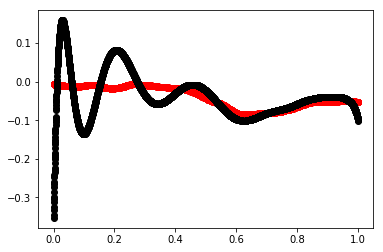

In [14]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,GSRTr,'pol',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.0
beta = 0.5
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(GSRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((GSRTr-PHI.dot(mn)).T).dot(GSRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(GSRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,GSRTr,'or')
plt.plot(xTr,yEstfin,'ok')


### Regresión bayesiana con funciones base exponencial

(4570L, 100L)
(100L, 1L) (100L, 100L)


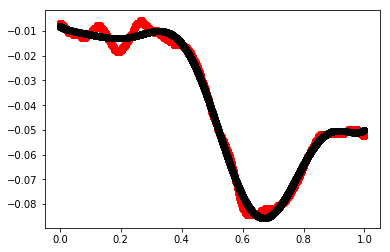

In [15]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,GSRTr,'exp',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.0
beta = 0.5
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(GSRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((GSRTr-PHI.dot(mn)).T).dot(GSRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(GSRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,GSRTr,'or')
plt.plot(xTr,yEstfin,'ok')


### Regresión bayesiana con funciones base sigmoidal

(4570L, 100L)
(100L, 1L) (100L, 100L)


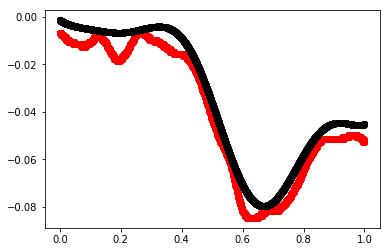

In [16]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,GSRTr,'sig',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.0
beta = 0.5
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(GSRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((GSRTr-PHI.dot(mn)).T).dot(GSRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(GSRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,GSRTr,'or')
plt.plot(xTr,yEstfin,'ok')


## Analizando HR